### Introduction

In this notebook, I performed sentiment analysis to explore the sentiments of each news articles

References: 
- https://www.analyticsvidhya.com/blog/2022/07/sentiment-analysis-using-python/
- https://www.analyticsvidhya.com/blog/2021/10/sentiment-analysis-with-textblob-and-vader/

### Techniques for Sentiment Analysis

There are a few ways to perform Sentiment Analysis on Python, such as:

- Rule-based sentiment analysis (e.g. refering to dictionary of negative and positive words). Python packages for these include:
    - TextBlob
    - Vader (Valence Aware Dictionary and sEntiment Reasoner)
- Pre-trained models on the Hugging Face Transformers Library (e.g. BERT, GPT-2)
- Machine Learning models trained on annotated data

For this analysis, I'll be using rule-based sentiment analysis because it: (1) runs faster, (2) is able to return a sentiment score, and (3) does not require annotation to train a model

After some exploration between TextBlob and Vader, I'm more inclined to use Vader as it appears to give more appropriate sentiment score

**Illustration of TextBlob vs Vader**

In [1]:
text1 = "I love you"
text2 = "I don't love you"

text3 = "the man survived the crash but was permanently paralysed"
text4 = "the man survived the crash"

In [2]:
# TextBlob

from textblob import TextBlob

print("TextBlob Sentiment Score for Text1: ", TextBlob(text1).sentiment.polarity)
print("TextBlob Sentiment Score for Text2: ", TextBlob(text2).sentiment.polarity)

print("TextBlob Sentiment Score for Text3: ", TextBlob(text3).sentiment.polarity)
print("TextBlob Sentiment Score for Text4: ", TextBlob(text4).sentiment.polarity)

TextBlob Sentiment Score for Text1:  0.5
TextBlob Sentiment Score for Text2:  0.5
TextBlob Sentiment Score for Text3:  0.0
TextBlob Sentiment Score for Text4:  0.0


In [3]:
# Vader

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

print("Vader Sentiment Score for Text1: ", SentimentIntensityAnalyzer().polarity_scores(text1)['compound'])
print("Vader Sentiment Score for Text2: ", SentimentIntensityAnalyzer().polarity_scores(text2)['compound'])

print("Vader Sentiment Score for Text3: ", SentimentIntensityAnalyzer().polarity_scores(text3)['compound'])
print("Vader Sentiment Score for Text4: ", SentimentIntensityAnalyzer().polarity_scores(text4)['compound'])

Vader Sentiment Score for Text1:  0.6369
Vader Sentiment Score for Text2:  -0.5216
Vader Sentiment Score for Text3:  0.0772
Vader Sentiment Score for Text4:  0.1531


### Sentiment Analysis on News Articles

In [4]:
import pandas as pd
import ast
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('straitstimes_articles_processed.csv')
df['Article Processed'] = df['Article Processed'].apply(ast.literal_eval)
df

,Published Date,Published Date (Standardised),Title,Article,Links,Published Year,Category,Town Involved,Title Processed,Article Processed
0,"January 2, 2013 at 7:49 PM",2013-01-02,Teo Ho Pin: Contract with AIM benefits town co...,The PAP town councils sold the management soft...,https://www.straitstimes.com/singapore/teo-ho-...,2013,NaN,Hougang,"['teo', 'ho', 'pin', 'contract', 'aim', 'benef...","[pap, town, council, sell, management, softwar..."
1,"January 2, 2013 at 5:10 PM",2013-01-02,Man jailed for punching friend's boyfriend,A salesman was jailed on Wednesday for a month...,https://www.straitstimes.com/singapore/man-jai...,2013,NaN,Punggol,"['man', 'jail', 'punch', 'friend', 'boyfriend']","[salesman, jail, wednesday, month, punch, 20, ..."
2,"January 2, 2013 at 11:09 AM",2013-01-02,"Man jailed, fined and banned over fatal accident",A truck driver who failed to help a severely i...,https://www.straitstimes.com/singapore/man-jai...,2013,NaN,Ang mo kio,"['man', 'jail', 'fin', 'ban', 'fatal', 'accide...","[truck, driver, fail, help, severely, injured,..."
3,"January 3, 2013 at 5:39 PM",2013-01-03,Money mule jailed 4 1/2 years for laundering $...,"In April, US$2.7 million (S$3.3 million) was d...",https://www.straitstimes.com/singapore/money-m...,2013,NaN,Punggol,"['money', 'mule', 'jail', '4', '1', '2', 'year...","[april, us, 2, 7, million, 3, 3, million, draw..."
4,"January 3, 2013 at 5:37 PM",2013-01-03,Two men found hiding in car boot arrested for ...,Two Indian nationals have been arrested for tr...,https://www.straitstimes.com/singapore/two-men...,2013,NaN,Woodlands,"['two', 'men', 'find', 'hiding', 'car', 'boot'...","[two, indian, national, arrest, try, slip, imm..."
...,...,...,...,...,...,...,...,...,...,...
5456,"October 4, 2023 at 7:16 PM",2023-10-04,Parliament debates on what constitutes basic n...,SINGAPORE - MPs debated what constitutes basic...,https://www.straitstimes.com/singapore/politic...,2023,politics,Sengkang,"['parliament', 'debate', 'constitute', 'basic'...","[singapore, mp, debate, constitute, basic, nee..."
5457,"October 4, 2023 at 6:30 PM",2023-10-04,Workers’ Party’s Louis Chua seeks to enshrine ...,SINGAPORE - Enshrining flexible work arrangeme...,https://www.straitstimes.com/singapore/politic...,2023,politics,Sengkang,"['worker', 'party', 'louis', 'chua', 'seek', '...","[singapore, enshrine, flexible, work, arrangem..."
5458,"October 25, 2023 at 11:05 AM",2023-10-25,$2.6b project to refresh Singapore’s oldest MR...,SINGAPORE – A $2.6 billion programme to renew ...,https://www.straitstimes.com/singapore/transpo...,2023,transport,Bishan,"['2', '6b', 'project', 'refresh', 'singapore',...","[singapore, 2, 6, billion, programme, renew, n..."
5459,"October 25, 2023 at 3:45 PM",2023-10-25,"Porsche, 2 Rolls-Royces among 4 cars seized fr...",SINGAPORE – Four luxury cars linked to Singapo...,https://www.straitstimes.com/singapore/courts-...,2023,courts-crime,Bukit timah,"['porsche', '2', 'rolls', 'royces', 'among', '...","[singapore, four, luxury, car, link, singapore..."


Comment: I was considering if I should apply the sentiment on the original article (i.e. column "Article") or the processed article with stopwords removed and lemmatisation (i.e. column "Article Processed"). The scores for the same article would be different.

In [6]:
example_text1 = " ".join(df[df['Category']=='courts-crime'].reset_index(drop=True).loc[0, 'Article Processed'])
example_text1

'ang mo kio town council website hack monday second people action party linked website compromise less two week hacker get pre school operator pap community foundation pcf website oct 17 believe behind late case sign messiah police confirm investigate case early saw messiah post message demand proper investigation incident one pcf centre baby allegedly scald hot coffee ang mo kio grc mp ang hin kee tell strait time town council website carry public information personal data compromise need vigilant hack happen time anywhere time try step level security end technology expert say hackings serve warning site secure point hacker make post town council site sunday website sneaker brand converse singapore also hack last month city harvest church co founder singer ho yeow sun website deface messiah hacking target mostly content based website exactly high profile one professor ang peng hwa director singapore internet research centre doubt part something sinister mr terrence tang senior directo

In [7]:
example_text2 = df[df['Category']=='courts-crime'].reset_index(drop=True).loc[0, 'Article']
example_text2

'Ang Mo Kio Town Council\'s website was hacked on Monday - the second People\'s Action Party-linked website to be compromised in less than two weeks. The hacker who got into pre-school operator PAP Community Foundation\'s (PCF) website on Oct 17 is believed to be behind the latest case, having again signed off as "The Messiah". Police confirmed they are investigating both cases, the earlier of which saw "The Messiah" post a message demanding a "proper investigation" into an incident at one of PCF\'s centres, where a baby was allegedly scalded by hot coffee. Ang Mo Kio GRC MP Ang Hin Kee told The Straits Times that as the town council\'s website carried only public information, no personal data had been compromised: "We need to be vigilant. Hacking can happen any time and anywhere. Each time we try to step up the level of security, it\'s not the end." Technology experts said the hackings should serve as a warning that some sites are not as secure as they should be - a point the hacker m

In [8]:
print("Vader Sentiment Score for Example Text1: ", SentimentIntensityAnalyzer().polarity_scores(example_text1)['compound'])
print("Vader Sentiment Score for Example Text2: ", SentimentIntensityAnalyzer().polarity_scores(example_text2)['compound'])

Vader Sentiment Score for Example Text1:  0.7906
Vader Sentiment Score for Example Text2:  -0.9312


Comment: The difference in the score can be explained by the fact that the same words in different form can have different scores

In [9]:
print("Vader Sentiment Score for the word 'Arrest': ", SentimentIntensityAnalyzer().polarity_scores('arrest')['compound'])
print("Vader Sentiment Score for the word 'Arrested': ", SentimentIntensityAnalyzer().polarity_scores('arrested')['compound'])
print("Vader Sentiment Score for the word 'Arresting': ", SentimentIntensityAnalyzer().polarity_scores('arresting')['compound'])

Vader Sentiment Score for the word 'Arrest':  -0.34
Vader Sentiment Score for the word 'Arrested':  -0.4767
Vader Sentiment Score for the word 'Arresting':  0.0


Comment: Hence, I decided to go for the original article

In [10]:
df['Sentiment Score'] = df['Article'].apply(lambda x: SentimentIntensityAnalyzer().polarity_scores(x)['compound'])
df

,Published Date,Published Date (Standardised),Title,Article,Links,Published Year,Category,Town Involved,Title Processed,Article Processed,Sentiment Score
0,"January 2, 2013 at 7:49 PM",2013-01-02,Teo Ho Pin: Contract with AIM benefits town co...,The PAP town councils sold the management soft...,https://www.straitstimes.com/singapore/teo-ho-...,2013,NaN,Hougang,"['teo', 'ho', 'pin', 'contract', 'aim', 'benef...","[pap, town, council, sell, management, softwar...",0.9791
1,"January 2, 2013 at 5:10 PM",2013-01-02,Man jailed for punching friend's boyfriend,A salesman was jailed on Wednesday for a month...,https://www.straitstimes.com/singapore/man-jai...,2013,NaN,Punggol,"['man', 'jail', 'punch', 'friend', 'boyfriend']","[salesman, jail, wednesday, month, punch, 20, ...",-0.2732
2,"January 2, 2013 at 11:09 AM",2013-01-02,"Man jailed, fined and banned over fatal accident",A truck driver who failed to help a severely i...,https://www.straitstimes.com/singapore/man-jai...,2013,NaN,Ang mo kio,"['man', 'jail', 'fin', 'ban', 'fatal', 'accide...","[truck, driver, fail, help, severely, injured,...",-0.9935
3,"January 3, 2013 at 5:39 PM",2013-01-03,Money mule jailed 4 1/2 years for laundering $...,"In April, US$2.7 million (S$3.3 million) was d...",https://www.straitstimes.com/singapore/money-m...,2013,NaN,Punggol,"['money', 'mule', 'jail', '4', '1', '2', 'year...","[april, us, 2, 7, million, 3, 3, million, draw...",-0.9382
4,"January 3, 2013 at 5:37 PM",2013-01-03,Two men found hiding in car boot arrested for ...,Two Indian nationals have been arrested for tr...,https://www.straitstimes.com/singapore/two-men...,2013,NaN,Woodlands,"['two', 'men', 'find', 'hiding', 'car', 'boot'...","[two, indian, national, arrest, try, slip, imm...",-0.8910
...,...,...,...,...,...,...,...,...,...,...,...
5456,"October 4, 2023 at 7:16 PM",2023-10-04,Parliament debates on what constitutes basic n...,SINGAPORE - MPs debated what constitutes basic...,https://www.straitstimes.com/singapore/politic...,2023,politics,Sengkang,"['parliament', 'debate', 'constitute', 'basic'...","[singapore, mp, debate, constitute, basic, nee...",0.9972
5457,"October 4, 2023 at 6:30 PM",2023-10-04,Workers’ Party’s Louis Chua seeks to enshrine ...,SINGAPORE - Enshrining flexible work arrangeme...,https://www.straitstimes.com/singapore/politic...,2023,politics,Sengkang,"['worker', 'party', 'louis', 'chua', 'seek', '...","[singapore, enshrine, flexible, work, arrangem...",0.9909
5458,"October 25, 2023 at 11:05 AM",2023-10-25,$2.6b project to refresh Singapore’s oldest MR...,SINGAPORE – A $2.6 billion programme to renew ...,https://www.straitstimes.com/singapore/transpo...,2023,transport,Bishan,"['2', '6b', 'project', 'refresh', 'singapore',...","[singapore, 2, 6, billion, programme, renew, n...",0.9904
5459,"October 25, 2023 at 3:45 PM",2023-10-25,"Porsche, 2 Rolls-Royces among 4 cars seized fr...",SINGAPORE – Four luxury cars linked to Singapo...,https://www.straitstimes.com/singapore/courts-...,2023,courts-crime,Bukit timah,"['porsche', '2', 'rolls', 'royces', 'among', '...","[singapore, four, luxury, car, link, singapore...",-0.9349


### Explore Sentiment Scores by Category

We first see if courts-crime news have a lower sentiment score than other types of news

In [11]:
df[['Category', 'Sentiment Score']].groupby('Category').mean().reset_index().rename(columns={'Sentiment Score':'Mean Sentiment Score'})

,Category,Mean Sentiment Score
0,community,0.529669
1,consumer,0.819216
2,courts-crime,-0.800850
3,education,0.776056
4,environment,0.286753
5,health,0.246533
6,housing,0.255674
7,jobs,0.988975
8,manpower,0.040018
9,parenting-education,0.875487


In [12]:
df[['Category', 'Sentiment Score']].groupby('Category').median().reset_index().rename(columns={'Sentiment Score':'Median Sentiment Score'})

,Category,Median Sentiment Score
0,community,0.94680
1,consumer,0.95940
2,courts-crime,-0.97325
3,education,0.98415
4,environment,0.80980
5,health,0.84420
6,housing,0.50325
7,jobs,0.99310
8,manpower,0.44040
9,parenting-education,0.99210


Comment: It does seem that crime related news have lower sentiment scores than other type of news. Hence, we can reasonably use sentiment score to gauge if a particular town is more or less negative

### Sentiment Score by Town Involved

**Mean Sentiment**

In [13]:
mean_town_sentiment = df[['Town Involved', 'Sentiment Score']].groupby('Town Involved').mean().reset_index().rename(columns={'Sentiment Score':'Mean Sentiment Score'})
mean_town_sentiment['Mean Sentiment Score'] = round(mean_town_sentiment['Mean Sentiment Score'], 3)
mean_town_sentiment = mean_town_sentiment.sort_values('Mean Sentiment Score').reset_index(drop=True)
mean_town_sentiment

,Town Involved,Mean Sentiment Score
0,Jurong west,-0.360
1,Geylang,-0.345
2,Clementi,-0.266
3,Bukit batok,-0.244
4,Bedok,-0.241
5,Woodlands,-0.202
6,Choa chu kang,-0.200
7,Hougang,-0.147
8,Serangoon,-0.142
9,Bukit panjang,-0.108


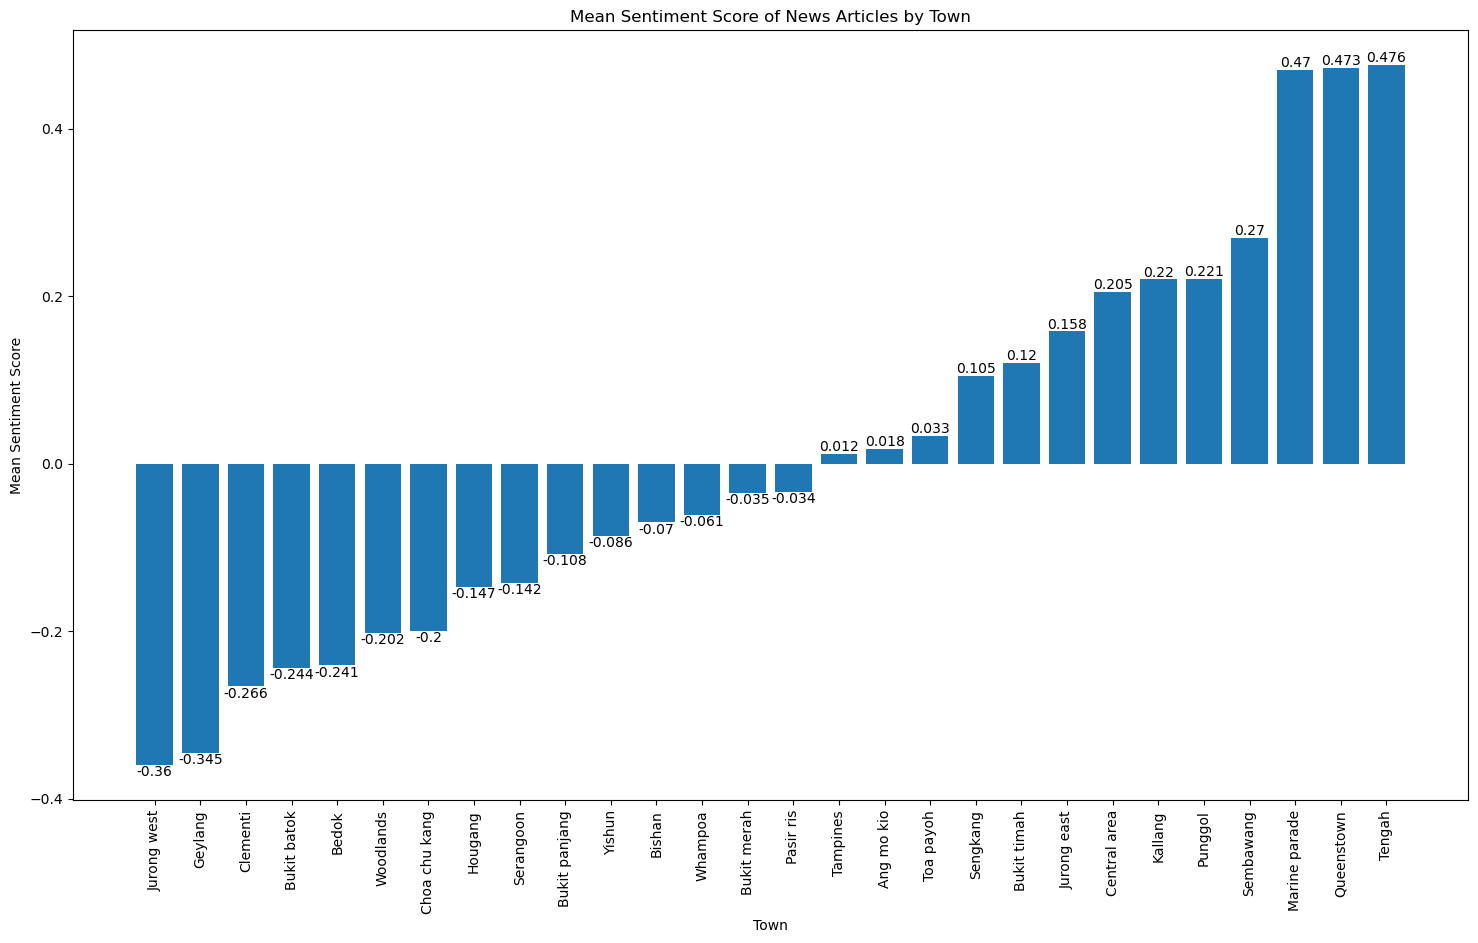

In [14]:
fig, ax = plt.subplots(figsize=(18,10))
bar_container = ax.bar(mean_town_sentiment['Town Involved'], mean_town_sentiment['Mean Sentiment Score'])

ax.set_title('Mean Sentiment Score of News Articles by Town')
ax.set_xlabel('Town')
ax.set_ylabel('Mean Sentiment Score')
ax.bar_label(bar_container)

plt.xticks(rotation=90);

**Median Sentiment**

In [15]:
median_town_sentiment = df[['Town Involved', 'Sentiment Score']].groupby('Town Involved').median().reset_index().rename(columns={'Sentiment Score':'Median Sentiment Score'})
median_town_sentiment['Median Sentiment Score'] = round(median_town_sentiment['Median Sentiment Score'], 3)
median_town_sentiment = median_town_sentiment.sort_values('Median Sentiment Score').reset_index(drop=True)
median_town_sentiment

,Town Involved,Median Sentiment Score
0,Jurong west,-0.924
1,Geylang,-0.874
2,Bedok,-0.859
3,Bukit batok,-0.796
4,Clementi,-0.784
5,Hougang,-0.743
6,Woodlands,-0.699
7,Choa chu kang,-0.661
8,Serangoon,-0.600
9,Bukit panjang,-0.550


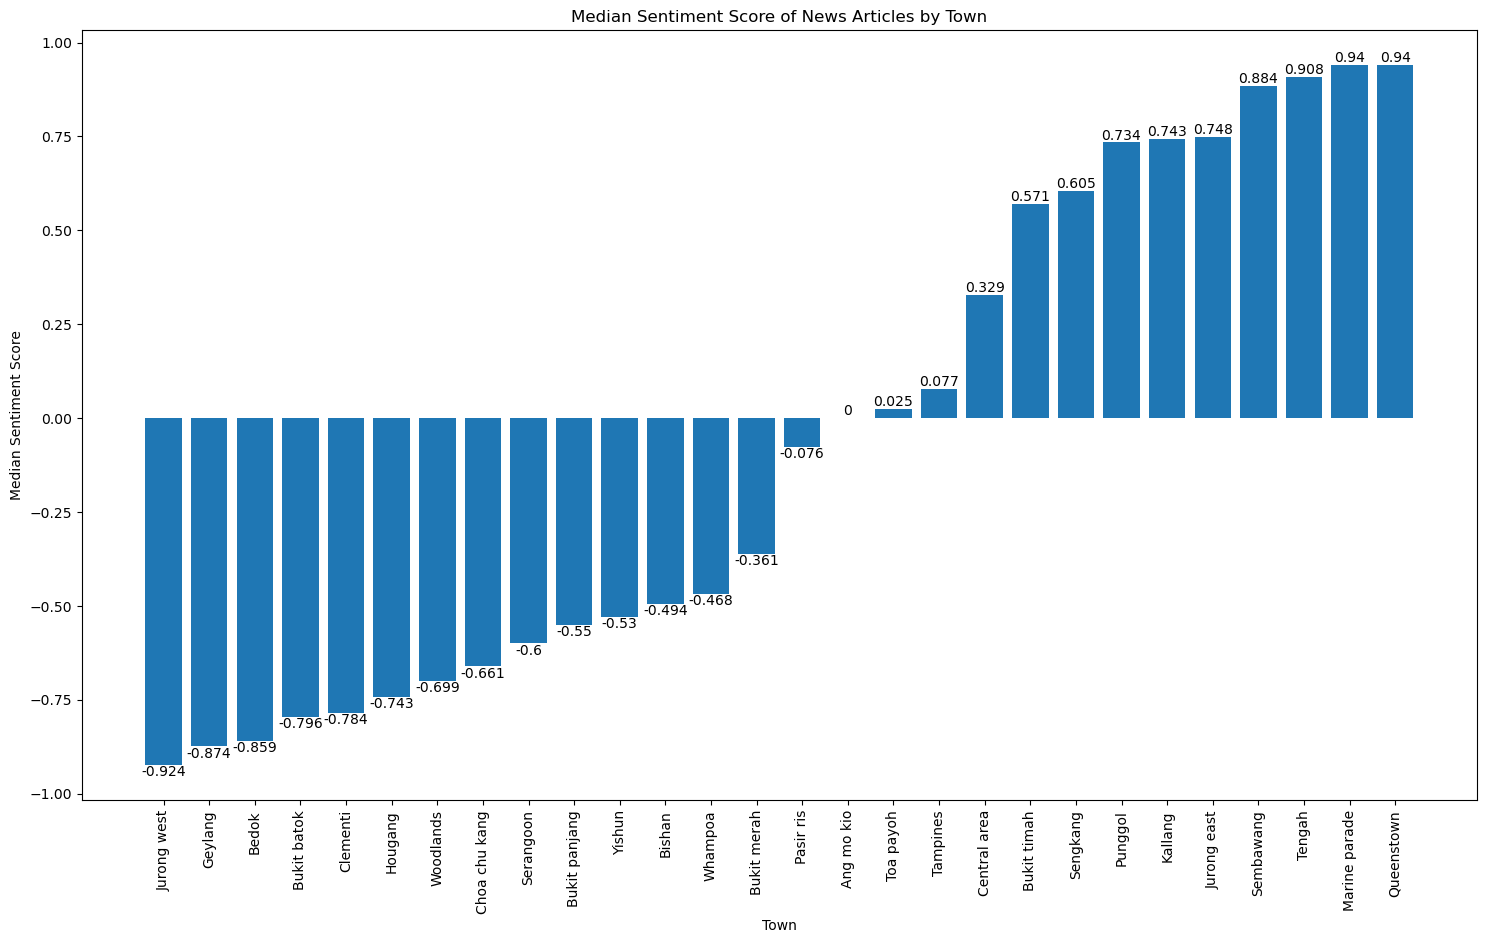

In [16]:
fig, ax = plt.subplots(figsize=(18,10))
bar_container = ax.bar(median_town_sentiment['Town Involved'], median_town_sentiment['Median Sentiment Score'])

ax.set_title('Median Sentiment Score of News Articles by Town')
ax.set_xlabel('Town')
ax.set_ylabel('Median Sentiment Score')
ax.bar_label(bar_container)

plt.xticks(rotation=90);

Comment: So Yishun has both negative mean and median sentiment score. But it does not seem to be the worse town with the worse score.

### Sentiment by Year

In [17]:
mean_year_sentiment = df[['Published Year', 'Sentiment Score']].groupby('Published Year').mean().reset_index().rename(columns={'Sentiment Score':'Mean Sentiment Score'})
mean_year_sentiment['Mean Sentiment Score'] = round(mean_town_sentiment['Mean Sentiment Score'], 3)
mean_year_sentiment

,Published Year,Mean Sentiment Score
0,2013,-0.360
1,2014,-0.345
2,2015,-0.266
3,2016,-0.244
4,2017,-0.241
5,2018,-0.202
6,2019,-0.200
7,2020,-0.147
8,2021,-0.142
9,2022,-0.108


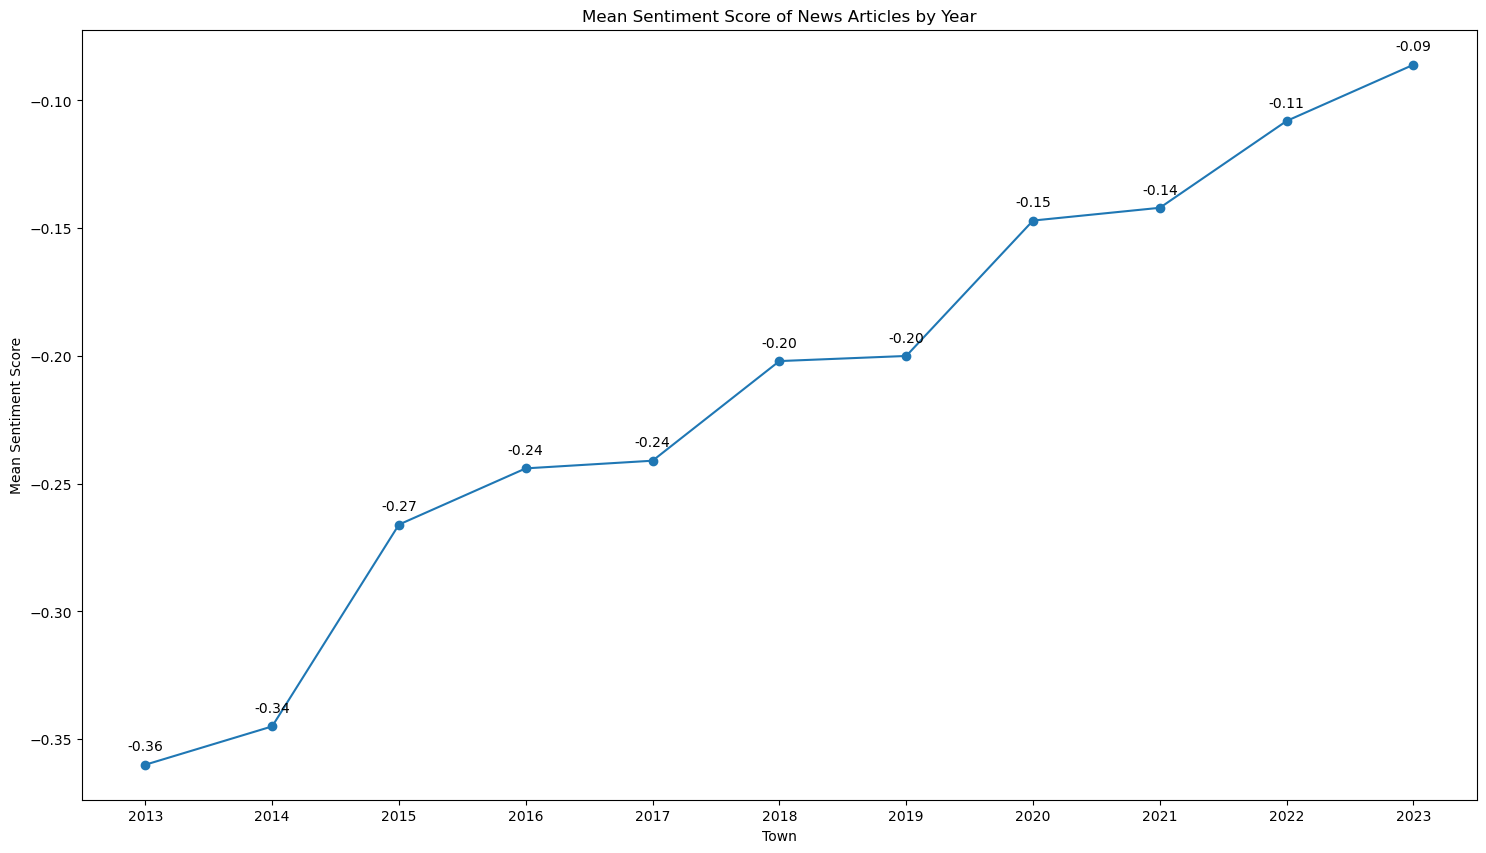

In [18]:
fig, ax = plt.subplots(figsize=(18,10))
ax.plot(mean_year_sentiment['Published Year'], mean_year_sentiment['Mean Sentiment Score'], marker='o')

ax.set_title('Mean Sentiment Score of News Articles by Year')
ax.set_xlabel('Town')
ax.set_xticks(mean_year_sentiment['Published Year'])
ax.set_ylabel('Mean Sentiment Score')

for i, (x, y) in enumerate(zip(mean_year_sentiment['Published Year'], mean_year_sentiment['Mean Sentiment Score'])):
    ax.annotate(f'{y:.2f}', (x, y), textcoords='offset points', xytext=(0, 10), ha='center');

In [19]:
median_year_sentiment = df[['Published Year', 'Sentiment Score']].groupby('Published Year').median().reset_index().rename(columns={'Sentiment Score':'Median Sentiment Score'})
median_year_sentiment['Median Sentiment Score'] = round(median_year_sentiment['Median Sentiment Score'], 3)
median_year_sentiment

,Published Year,Median Sentiment Score
0,2013,-0.340
1,2014,-0.178
2,2015,-0.273
3,2016,-0.866
4,2017,-0.796
5,2018,-0.742
6,2019,-0.867
7,2020,0.511
8,2021,0.910
9,2022,0.739


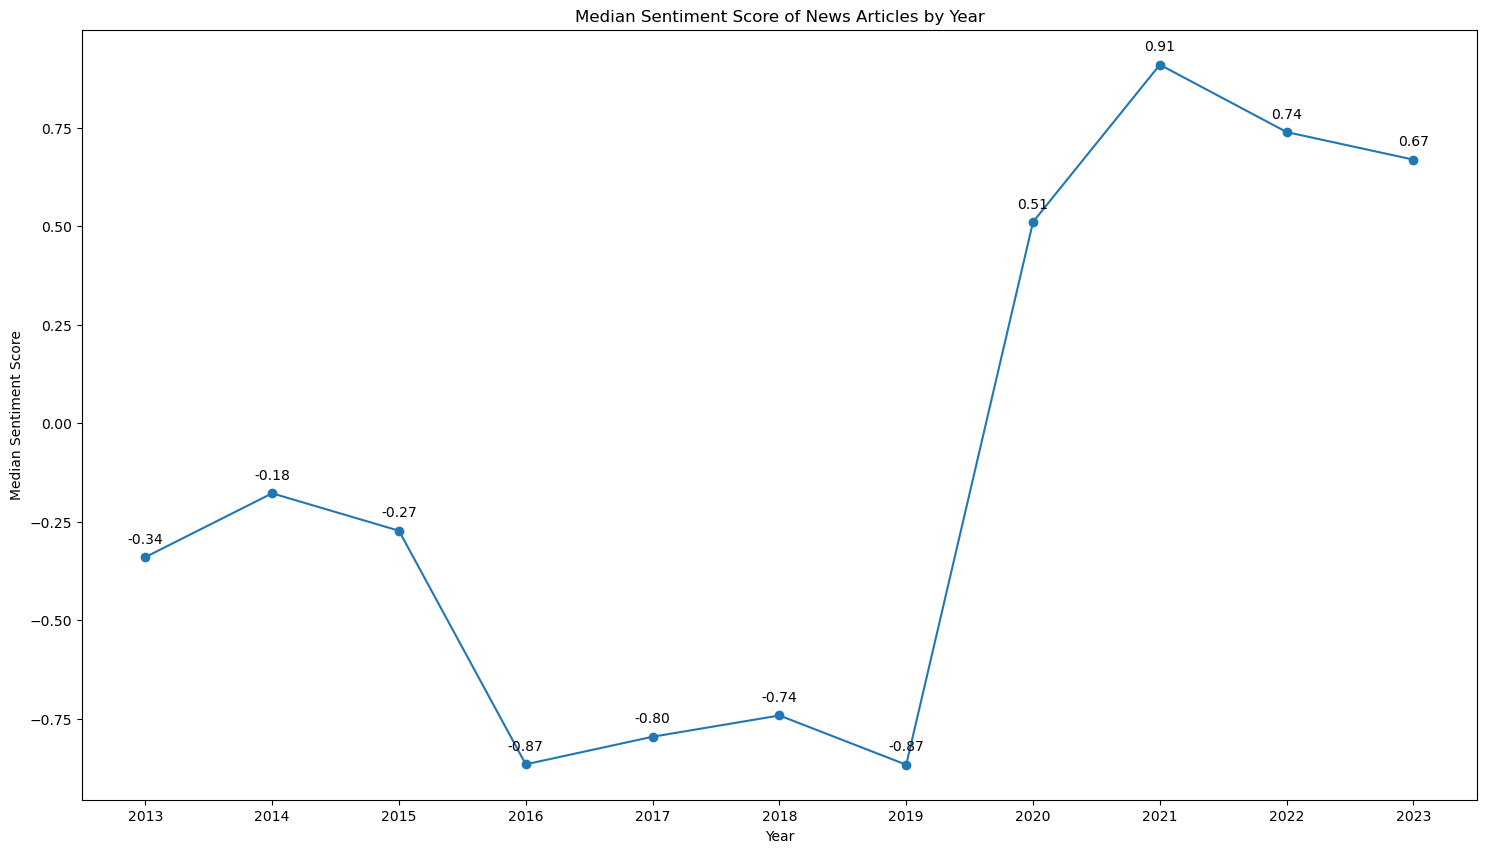

In [20]:
fig, ax = plt.subplots(figsize=(18,10))
ax.plot(median_year_sentiment['Published Year'], median_year_sentiment['Median Sentiment Score'], marker='o')

ax.set_title('Median Sentiment Score of News Articles by Year')
ax.set_xlabel('Year')
ax.set_xticks(median_year_sentiment['Published Year'])
ax.set_ylabel('Median Sentiment Score')

for i, (x, y) in enumerate(zip(median_year_sentiment['Published Year'], median_year_sentiment['Median Sentiment Score'])):
    ax.annotate(f'{y:.2f}', (x, y), textcoords='offset points', xytext=(0, 10), ha='center');

Comment: Interestingly, the sentiments of the news appear to increase over the years